In [1]:
import trimesh
import numpy as np
from shapely.geometry import LineString
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load the mesh from filename
# file objects are also supported
mesh = trimesh.load_mesh('../models/featuretype.STL')

In [3]:
# get a single cross section of the mesh
slice = mesh.section(plane_origin=mesh.centroid, 
                     plane_normal=[0,0,1])

In [4]:
# the section will be in the original mesh frame
slice

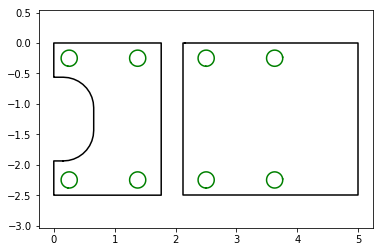

In [5]:
# we can move the 3D curve to a Path2D object easily
slice_2D, to_3D = slice.to_planar()
slice_2D.show()

In [6]:
# if we wanted to take a bunch of parallel slices, like for a 3D printer
# we can do that easily with the section_multiplane method
# we're going to slice the mesh into evenly spaced chunks along z
# this takes the (2,3) bounding box and slices it into [minz, maxz]
z_extents = mesh.bounds[:,2]
# slice every .125 model units (eg, inches)
z_levels  = np.arange(*z_extents, step=.125)

In [7]:
# find a bunch of parallel cross sections
sections = mesh.section_multiplane(plane_origin=mesh.bounds[0], 
                                   plane_normal=[0,0,1], 
                                   heights=z_levels)
sections

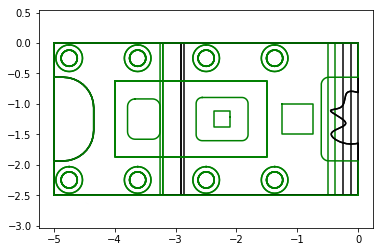

In [8]:
# summing the array of Path2D objects will put all of the curves
# into one Path2D object, which we can plot easily
combined = np.sum(sections)
combined.show()

In [9]:
# if we want to intersect a line with this 2D polygon, we can use shapely methods
polygon = slice_2D.polygons_full[0]
hits = polygon.intersection(LineString([[-4,-1], [3,0]]))
hits.__class__

shapely.geometry.multilinestring.MultiLineString

/home/mikedh/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


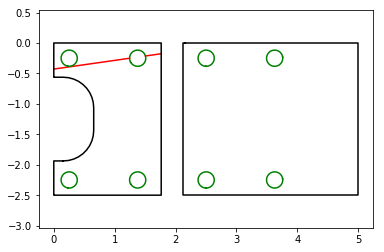

In [10]:
# we can plot the intersection (red) and our original geometry(black and green)
for h in hits:
    plt.plot(*h.xy, color='r')
slice_2D.show()

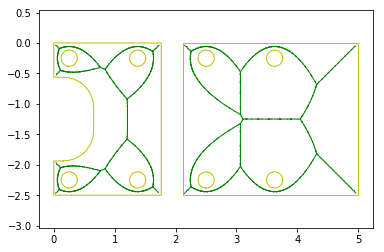

In [11]:
# the medial axis is available for closed Path2D objects
(slice_2D + slice_2D.medial_axis()).show()